In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
cancer_data = pd.read_csv("data.csv")# creating the data frame for the  cancer data set here I downloaded the file

In [40]:
diabetes_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'# here we are directly taking the raw data from the github so we need to 
diabetes_columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age', 'outcome']
diabetes_data = pd.read_csv(diabetes_url, header=None, names=diabetes_columns)
cancer_data = pd.read_csv("data.csv")

In [41]:
cancer_data = cancer_data.drop(cancer_data.columns[32], axis=1)# dropping of an Extra column as it will create issue in while using with Random forest model
print(diabetes_data)

     pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     diabetes_pedigree  age  outcome  
0                0.627   50        1  
1        

In [19]:
#Doing some basic pre-processing work ,checking for missing values (these are well organised Dataset)
print("Breast Cancer  Dataset - Missing Values:\n", cancer_data.isnull().sum())
print("Diabetes Dataset - Missing Values:\n", diabetes_data.isnull().sum())



Breast Cancer  Dataset - Missing Values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Diabetes Dataset 

In [20]:
print("Breast Cancer  Dataset - Duplicates: ", cancer_data.duplicated().sum())
print("Diabetes  Dataset - Duplicates: ", diabetes_data.duplicated().sum())


Breast Cancer  Dataset - Duplicates:  0
Diabetes  Dataset - Duplicates:  0


In [21]:
# Check data types
print("\nBreast Cancer  Dataset - Data Types:\n", cancer_data.dtypes)
print("\n Diabetes Dataset - Data Types:\n", diabetes_data.dtypes)





Breast Cancer  Dataset - Data Types:
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_wors

In [22]:
#here 
X_diabetes = diabetes_data.drop('outcome', axis=1)
y_diabetes = diabetes_data['outcome']
X_cancer = cancer_data.drop('diagnosis', axis=1)
y_cancer = cancer_data['diagnosis']


In [23]:
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)



In [24]:
rf_diabetes = RandomForestClassifier(random_state=42)
rf_diabetes.fit(X_diabetes_train, y_diabetes_train)
rf_cancer = RandomForestClassifier(random_state=42)
rf_cancer.fit(X_train_cancer, y_train_cancer)


RandomForestClassifier(random_state=42)

In [25]:
rf_diabetes_pred = rf_diabetes.predict(X_diabetes_test)
rf_cancer_pred = rf_cancer.predict(X_test_cancer)



In [26]:
unique_values_A = cancer_data['diagnosis'].unique()
print(unique_values_A)

['M' 'B']


In [27]:
rf_diabetes_accuracy = accuracy_score(y_diabetes_test, rf_diabetes_pred)
rf_diabetes_precision = precision_score(y_diabetes_test, rf_diabetes_pred)
rf_diabetes_recall = recall_score(y_diabetes_test, rf_diabetes_pred)
rf_diabetes_f1 = f1_score(y_diabetes_test, rf_diabetes_pred)
rf_diabetes_roc_auc = roc_auc_score(y_diabetes_test, rf_diabetes.predict_proba(X_diabetes_test)[:, 1])

rf_cancer_accuracy = accuracy_score(y_test_cancer, rf_cancer_pred)
rf_cancer_precision = precision_score(y_test_cancer, rf_cancer_pred, pos_label='M')
rf_cancer_recall = recall_score(y_test_cancer, rf_cancer_pred, pos_label='M')
rf_cancer_f1 = f1_score(y_test_cancer, rf_cancer_pred, pos_label='M')
rf_cancer_roc_auc = roc_auc_score(y_test_cancer, rf_cancer.predict_proba(X_test_cancer)[:, 1])


In [28]:
print("Random Forest - Diabetes:")
print(f"Accuracy: {rf_diabetes_accuracy:.4f}")
print(f"Precision: {rf_diabetes_precision:.4f}")
print(f"Recall: {rf_diabetes_recall:.4f}")
print(f"F1 Score: {rf_diabetes_f1:.4f}")
print(f"ROC AUC: {rf_diabetes_roc_auc:.4f}")
print()

print("Random Forest - cancer:")
print(f"Accuracy: {rf_cancer_accuracy:.4f}")
print(f"Precision: {rf_cancer_precision:.4f}")
print(f"Recall: {rf_cancer_recall:.4f}")
print(f"F1 Score: {rf_cancer_f1:.4f}")
print(f"ROC AUC: {rf_cancer_roc_auc:.4f}")
print()

Random Forest - Diabetes:
Accuracy: 0.7208
Precision: 0.6071
Recall: 0.6182
F1 Score: 0.6126
ROC AUC: 0.8110

Random Forest - cancer:
Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1 Score: 0.9524
ROC AUC: 0.9972



In [29]:
#Doing some basic visualisation
importances_diabetes = rf_diabetes.feature_importances_
importances_cancer = rf_cancer.feature_importances_


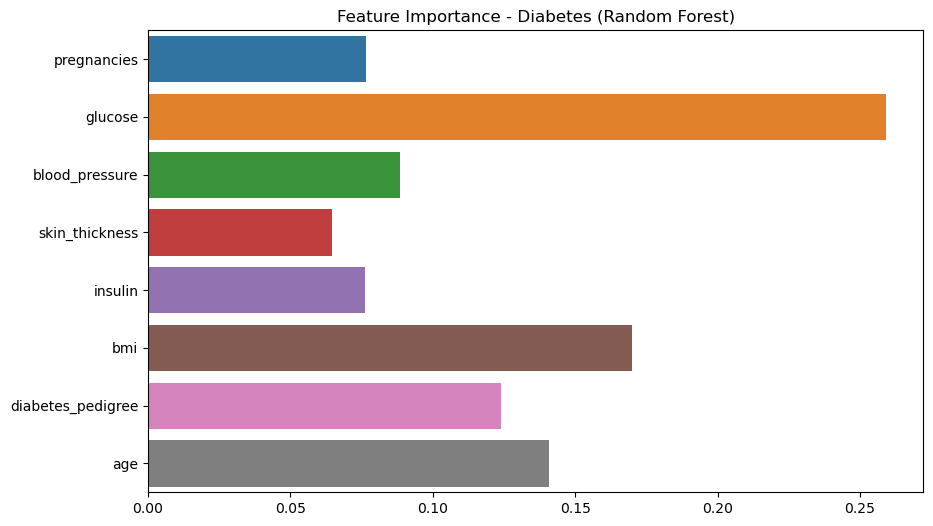

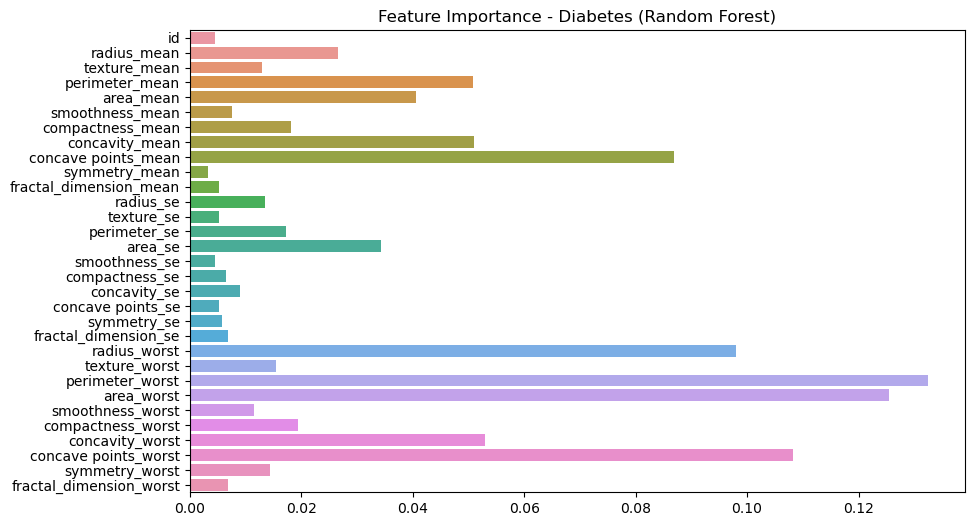

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_diabetes, y=X_diabetes.columns)
plt.title('Feature Importance - Diabetes (Random Forest)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x=importances_cancer, y=X_cancer.columns)
plt.title('Feature Importance - Diabetes (Random Forest)')
plt.show()

In [31]:
#SVM
svm_diabetes = SVC(probability=True, random_state=42)
svm_diabetes.fit(X_diabetes_train, y_diabetes_train)

svm_cancer = SVC(probability=True, random_state=42)
svm_cancer.fit(X_train_cancer, y_train_cancer)


SVC(probability=True, random_state=42)

In [32]:
svm_diabetes_pred = svm_diabetes.predict(X_diabetes_test)
svm_cancer_pred = svm_cancer.predict(X_test_cancer)


In [33]:
svm_diabetes_accuracy = accuracy_score(y_diabetes_test, svm_diabetes_pred)
svm_diabetes_precision = precision_score(y_diabetes_test, svm_diabetes_pred)
svm_diabetes_recall = recall_score(y_diabetes_test, svm_diabetes_pred)
svm_diabetes_f1 = f1_score(y_diabetes_test, svm_diabetes_pred)
svm_diabetes_roc_auc = roc_auc_score(y_diabetes_test, svm_diabetes.predict_proba(X_diabetes_test)[:, 1])

svm_cancer_accuracy = accuracy_score(y_test_cancer, svm_cancer_pred)
svm_cancer_precision = precision_score(y_test_cancer, svm_cancer_pred, pos_label='M')
svm_cancer_recall = recall_score(y_test_cancer, svm_cancer_pred, pos_label='M')
svm_cancer_f1 = f1_score(y_test_cancer, svm_cancer_pred, pos_label='M')
svm_cancer_roc_auc = roc_auc_score(y_test_cancer, svm_cancer.predict_proba(X_test_cancer)[:, 1])


/Users/allwindenny/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
print("SVM - Diabetes:")
print(f"Accuracy: {svm_diabetes_accuracy:.4f}")
print(f"Precision: {svm_diabetes_precision:.4f}")
print(f"Recall: {svm_diabetes_recall:.4f}")
print(f"F1 Score: {svm_diabetes_f1:.4f}")
print(f"ROC AUC: {svm_diabetes_roc_auc:.4f}")
print()

print("SVM - cancer:")
print(f"Accuracy: {svm_cancer_accuracy:.4f}")
print(f"Precision: {svm_cancer_precision:.4f}")
print(f"Recall: {svm_cancer_recall:.4f}")
print(f"F1 Score: {svm_cancer_f1:.4f}")
print(f"ROC AUC: {svm_cancer_roc_auc:.4f}")
print()

SVM - Diabetes:
Accuracy: 0.7662
Precision: 0.7209
Recall: 0.5636
F1 Score: 0.6327
ROC AUC: 0.8066

SVM - cancer:
Accuracy: 0.6228
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.3816

